In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Few of the features are not identified with the right datatype, so changing them

In [6]:
df['waterfront'] = df['waterfront'].astype('object')
df['view'] = df['view'].astype('object')
df['condition'] = df['condition'].astype('object')
df['grade'] = df['grade'].astype('object')
df['zipcode'] = df['zipcode'].astype('object')

In [7]:
# date column should be dropped 
df = df.drop('date',axis=1)

In [8]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(np.number)

In [9]:
# Checking for null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### So, there are no null values in our dataset

In [10]:
df[df=='?'].count()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### There are no null values in the form of '?' too.

In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,4820.00,2015.00,2015.00,47.78,-121.31,6210.00,871200.00


#### Inferences from describe:

* The target variable varies between 75000 and 77 lakh. The mean is greater than median, so it is right skewed. We can also observe that there are few luxury houses which have price more than 7 lakh, as we can see by comparing the 75th percentile and the maximum
* The number of bedrooms vary between 0 and 33. The mean and median are almost same. We can see that, the maximum and 75th percentile are very much different, so most of the houses have 3-4 bedrooms and luxury flats alone have in two digits.
* The number of bathrooms vary between 0 and 8. The mean and median are slightly  different, so the distribution should be skewed.
* sqft_living varies between 290 and 13540, so there are small and luxury houses in our dataset And, here too the mean and median are very much different, so the data is skewed.
* sqft_lot varies between 520 to 1 crore, it definitely confirms luxury houses and mansions in our dataset, the mean and median are different, so it is also skewed.
* Number of floors varies between 1 to 3.5 and the mean and median are almost equal
* sqft_above varies between 290 to 9410, and the mean and median are very much different So, the distribution is skewed.
* sqft_basement varies between 0 and 4820. So, very few houses have underground levels and few of them are small and few are big.
* yr_built varies between 1900 to 2015, so there are very old to new houses. But, most of them seem to be little  old. The mean and median are different here too.
* yr_renovated varies between 0 to 2015. So, many of the houses are not renovated and only a few of them have been renovated in recent times.
* sqft_living15 varies between 399 to 6210. The mean and median are highly different, so the distribution is skewed
* sqft_lot15 varies between 651 to 871200, which is clearly right skewed.

### Target Variable

In [13]:
df['price'].nunique()

4028

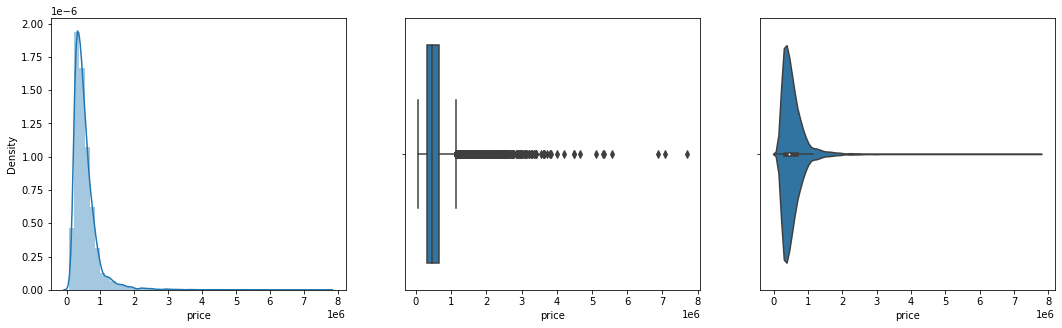

In [14]:
plt.rcParams['figure.figsize'] = 18,5
fig,ax= plt.subplots(1,3)
sns.distplot(df['price'],ax=ax[0])
sns.boxplot(df['price'],ax=ax[1])
sns.violinplot(df['price'],ax=ax[2])
plt.show()

Our target variable is highly skewed.

### Univariate Analysis

id


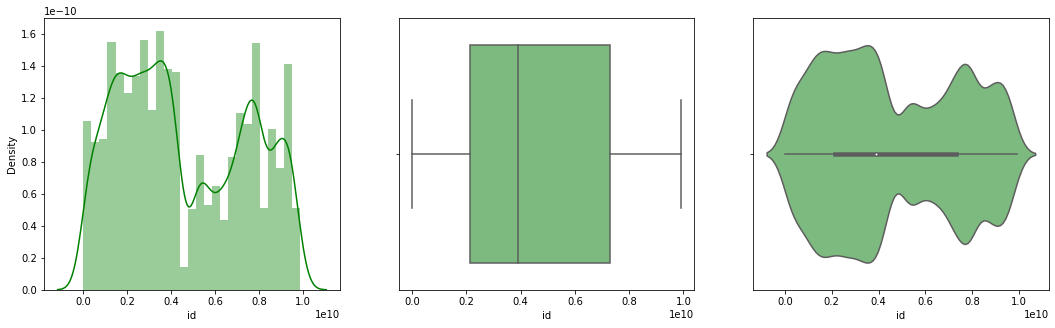

price


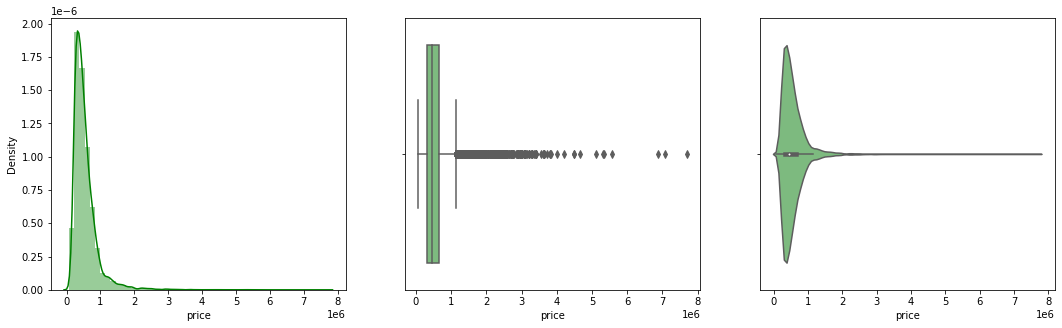

bedrooms


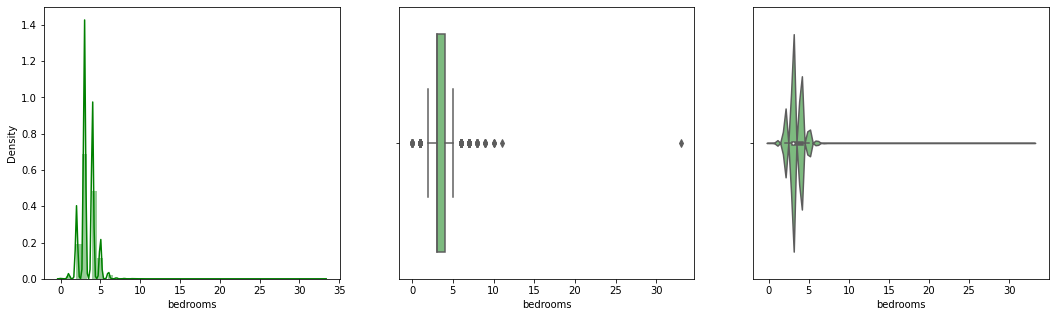

bathrooms


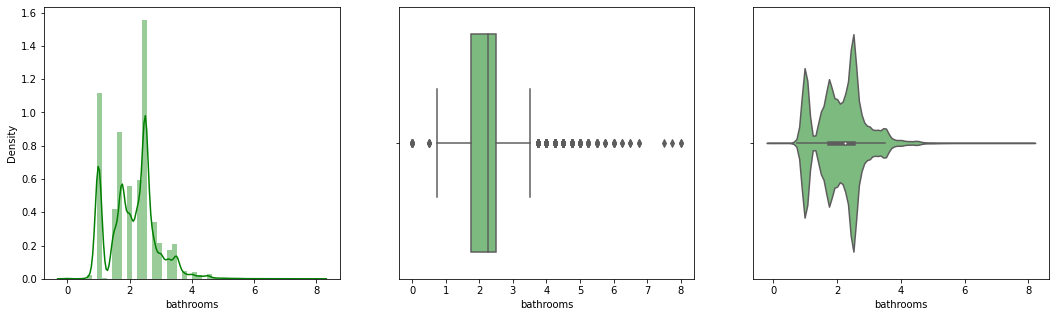

sqft_living


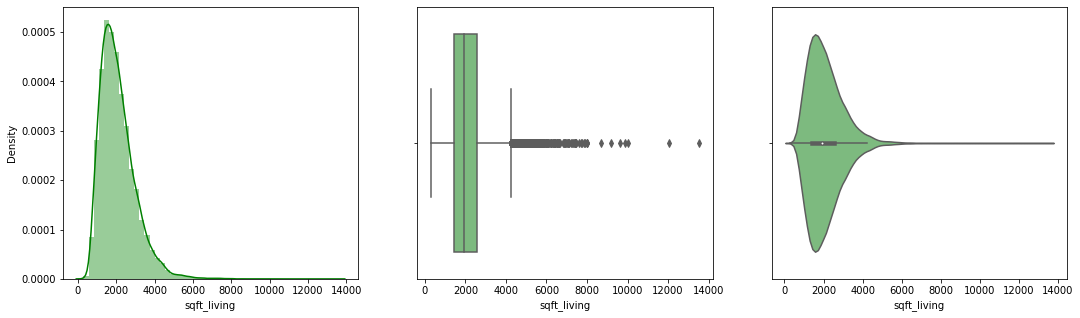

sqft_lot


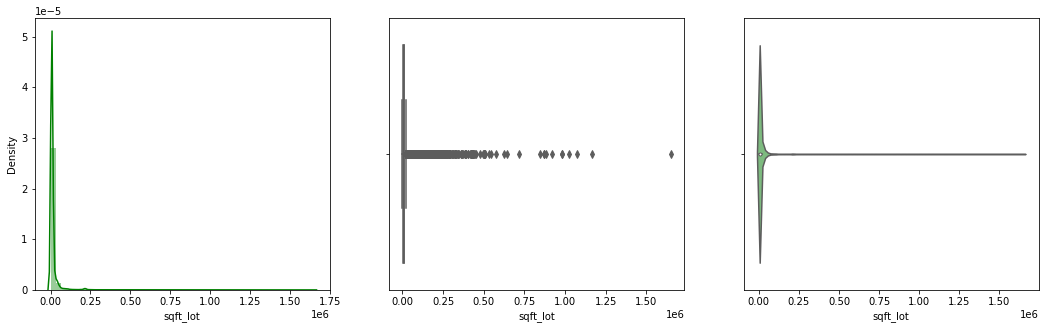

floors


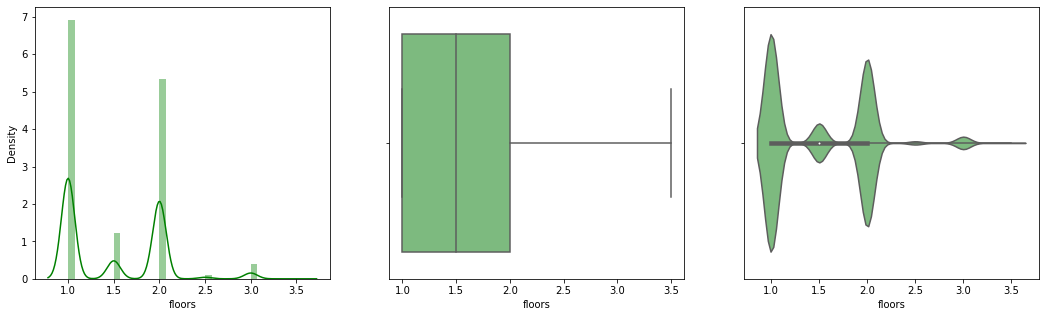

sqft_above


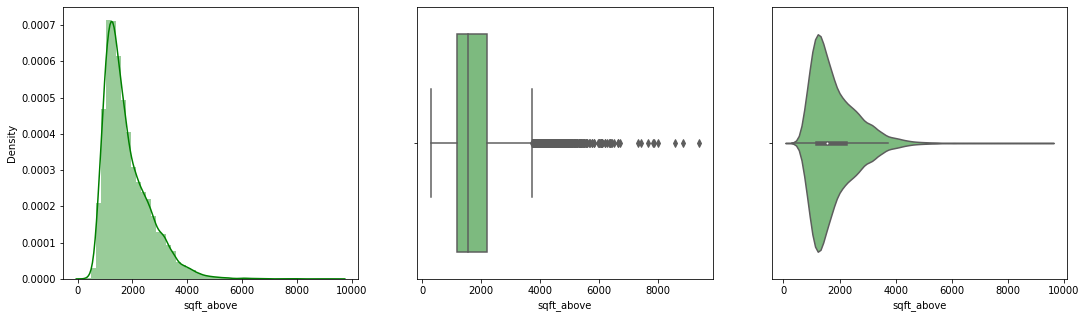

sqft_basement


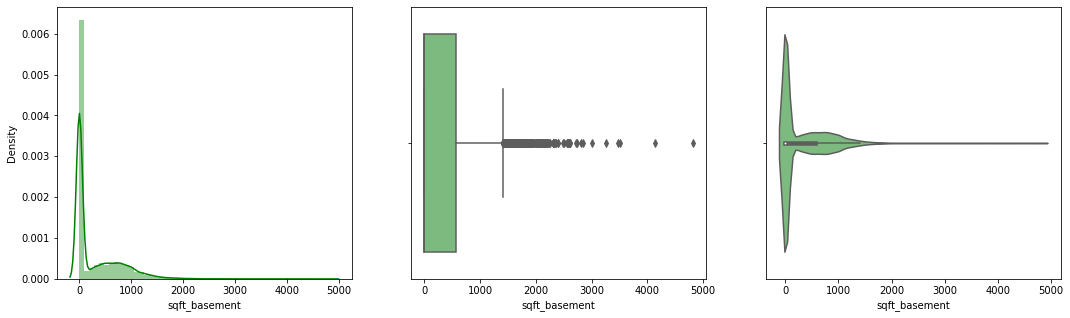

yr_built


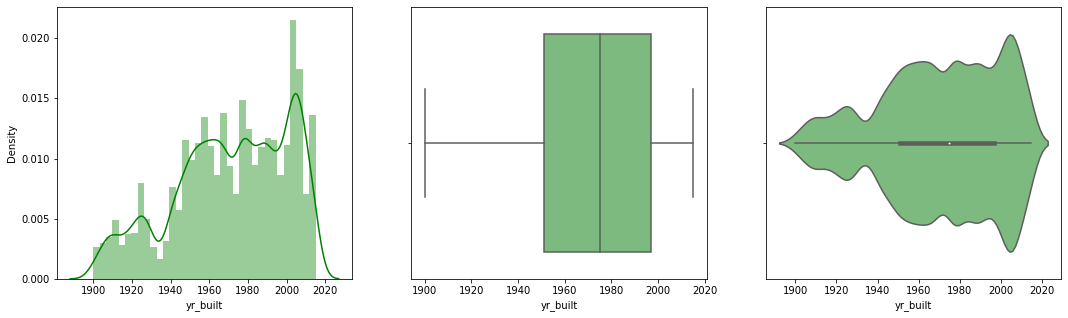

yr_renovated


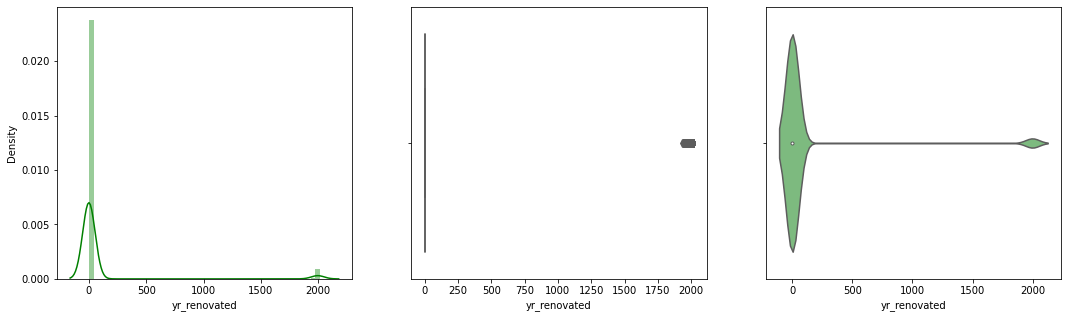

lat


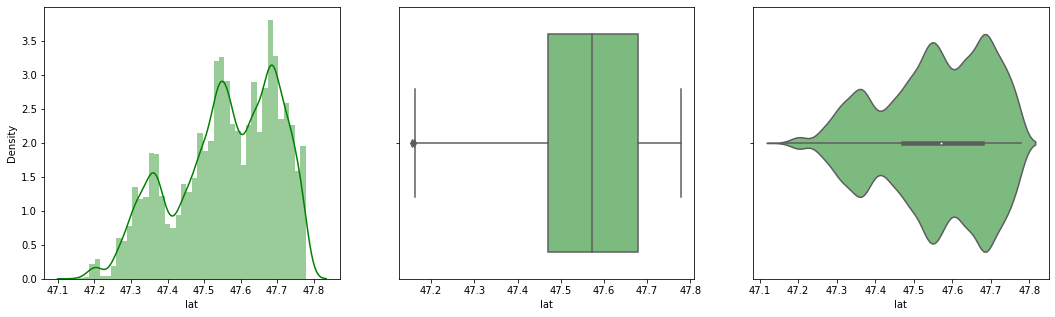

long


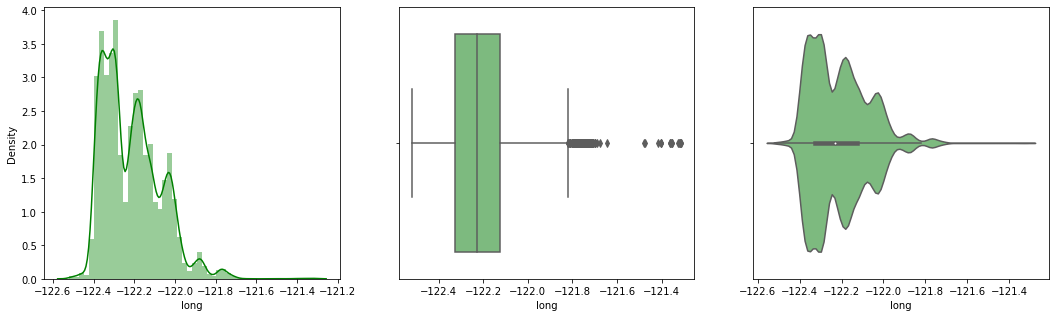

sqft_living15


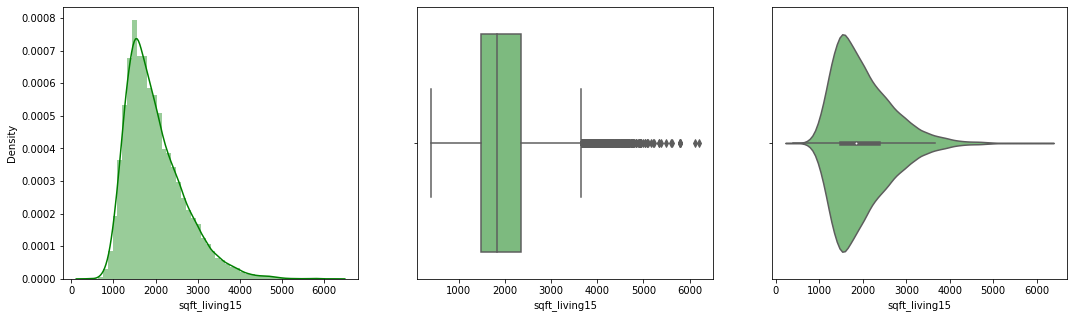

sqft_lot15


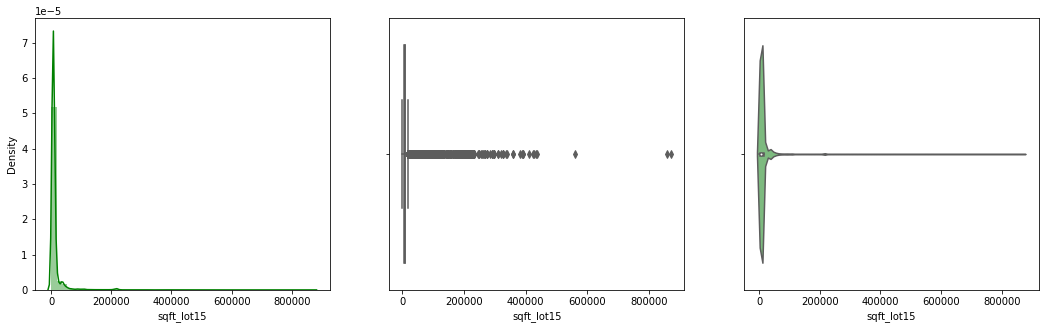

In [15]:
# Numerical columns
for i in df_num:
    fig,ax= plt.subplots(1,3)
    print(i)
    sns.distplot(df_num[i],ax=ax[0],color='Green')
    sns.boxplot(df_num[i],ax=ax[1],palette='Greens')
    sns.violinplot(df_num[i],ax=ax[2],palette='Greens')
    plt.show()

#### Inferences from the univariate analysis of Numerical columns:
* Bedrooms are mostly between 0 to 10, and only one of them has above 30, which is a outlier
* Number of bathrooms is mainly between 0 to 4, and it varies till 8
* sqft_living is right skewed too, with few observations having higher value of sqft_living
* sqft_lot is highly right skewed, with most of the data in the outliers
* Number of floors is mostly between 1 to 2, with a maximum of 3.4
* sqft_above has most of the values between 0 to 4000 and the values lead till 10000
* sqft_basement is right skewed too, with most of the houses with less than 1500 and few houses with more than that
* yr_built as saw from the describe function, is varying from 1900 to 2020
* yr_renovated has only two values, which is 0 and 2000, which means that most of the houses are not renovated and few were renovated in 2000
* lat is varying between 47.1 to 47.8, so we can say that these houses are in a particular region
* long is varying between -122.6 to -121.2, this to confirms that these are houses from closer regions
* sqft_living15 is varying between 0 to 6000 and mainly in the range till 4000, it is also right skewed
* sqft_lot15 is highly right skewed.


waterfront


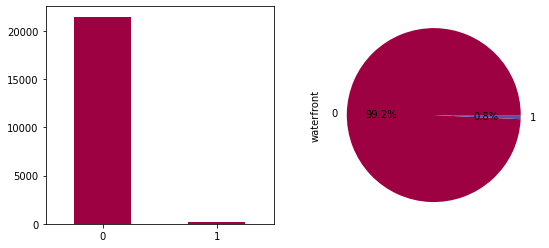

view


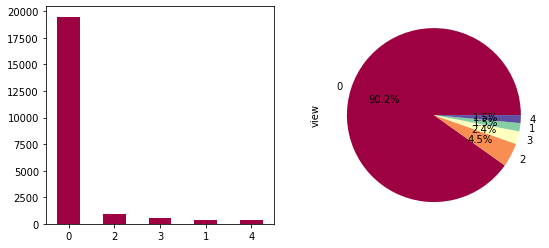

condition


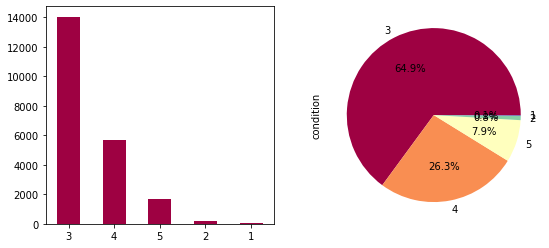

grade


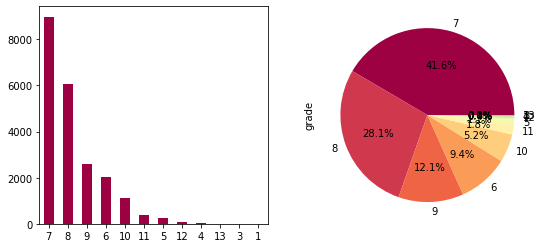

zipcode


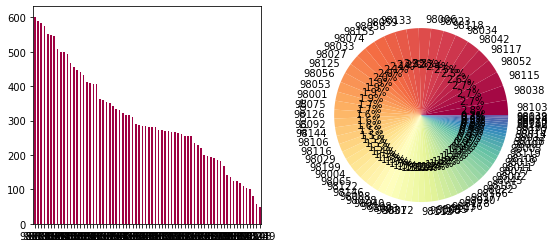

In [16]:
# Categorical columns
plt.rcParams['figure.figsize'] = 9,4
for i in df_cat:
    fig,ax= plt.subplots(1,2)
    print(i)
    df_cat[i].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Spectral')
    df_cat[i].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Spectral')
    plt.show()

#### Inferences from the categorical features:
* In waterfront column, most of the values is 0 and only 0.8% of people's apartment was overlooking the waterfront, so it is a good factor
* In view column too, most of the values are 0 and 2 is second highest, so the houses are not having that good of a view
* In condition column, most of the values are 3, followed by 4, so almost all the houses are in good condition, only around 10% of houses are not in good condition
* In grade column, most of the values, around 40% have given grade of 7 followed by 8, and 9. So, these are good houses
* zipcode has around 70 unique values and most of them contribute almost equally.

### Bivariate Analysis

id Vs price


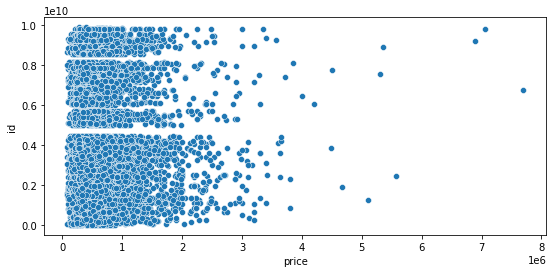

price Vs price


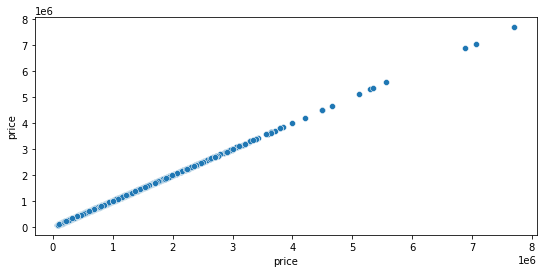

bedrooms Vs price


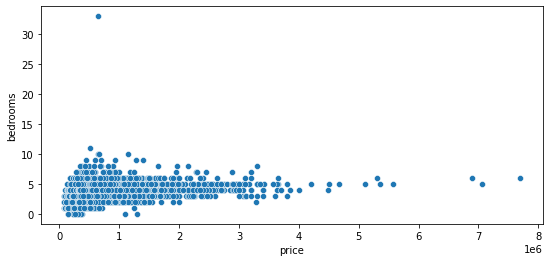

bathrooms Vs price


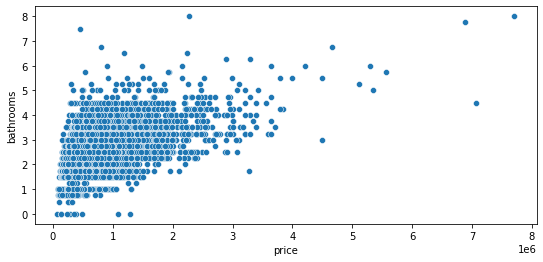

sqft_living Vs price


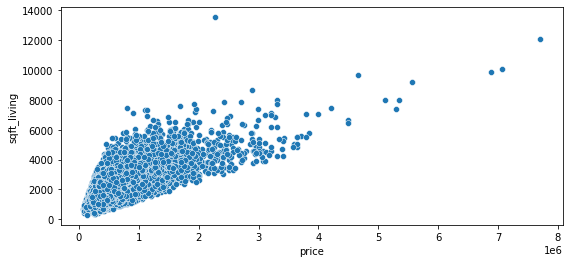

sqft_lot Vs price


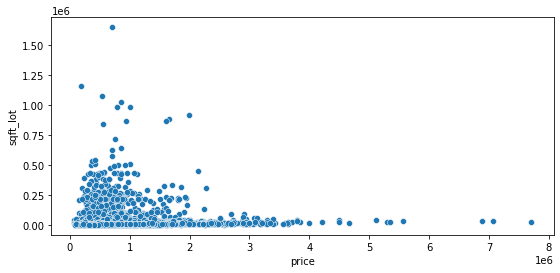

floors Vs price


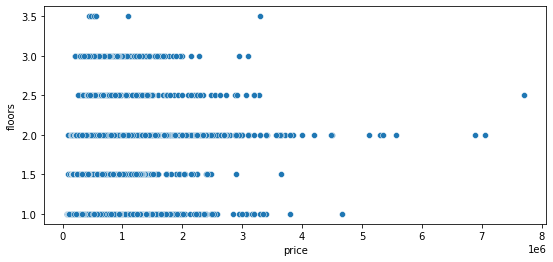

sqft_above Vs price


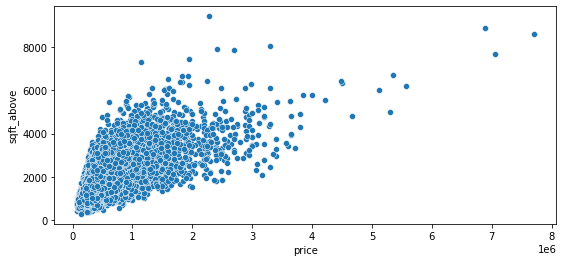

sqft_basement Vs price


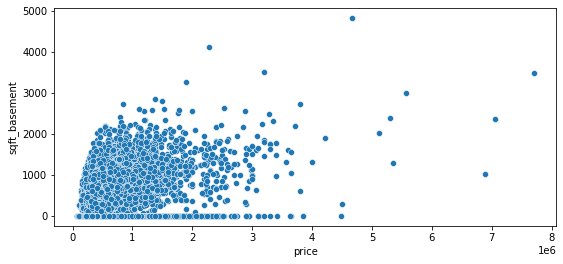

yr_built Vs price


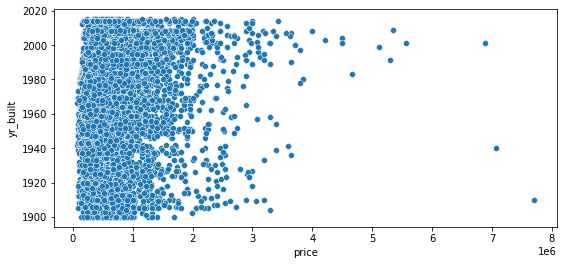

yr_renovated Vs price


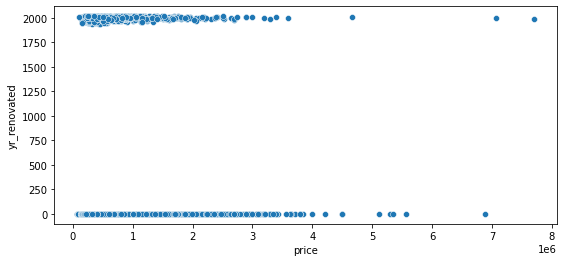

lat Vs price


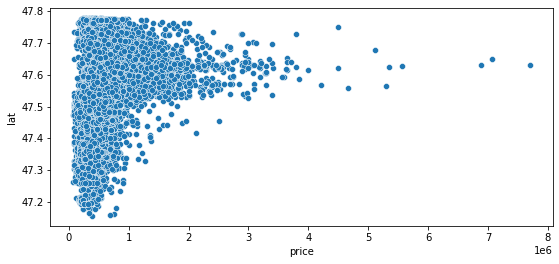

long Vs price


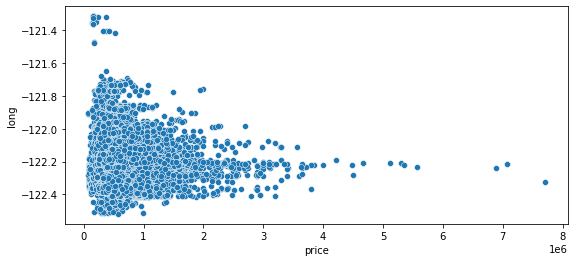

sqft_living15 Vs price


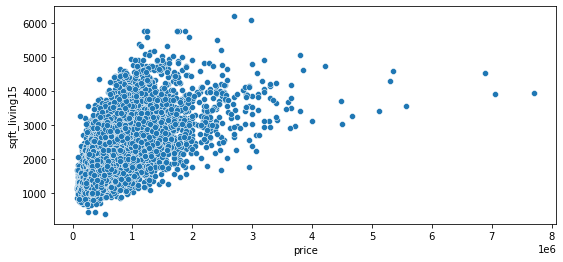

sqft_lot15 Vs price


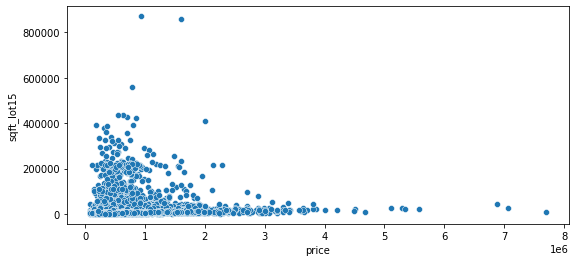

In [17]:
# Numerical with Target variable
i=1
for col in df_num:
    print(col,'Vs price')
    sns.scatterplot(df_num['price'],df_num[col])
    plt.show()

#### Inferences from the bivariate analysis of the numerical features:
* The number of bedrooms doesn't seem to have a linear relationship with the price feature
* The number of bathrooms is having almost linear relationship with the price, with increase in number of bathrooms, the price is increasing too
* The sqft_living feature is having almost perfect linear relationship with price
* The sqft_lot feature doesn't seem to have a relation with price
* The number of floors too is not contributing much to the price feature
* sqft_above is having a linear relationship with price
* sqft_basement is not having much effect on price feature
* yr_built has very little relation with the price feature
* yr_renovated with only two values in it, does not have an effect on price feature
* lat seems to have very little effect on price
* long doesn't seem to have much effect on price
* sqft_living15 is having slightly lineary relationship with price
* sqft_lot15 is not having any relation with price

waterfront Vs price


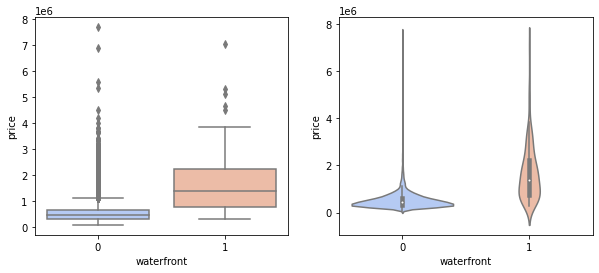

view Vs price


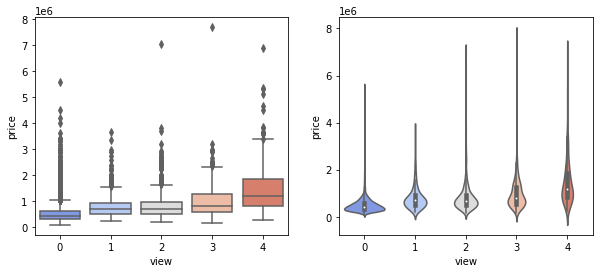

condition Vs price


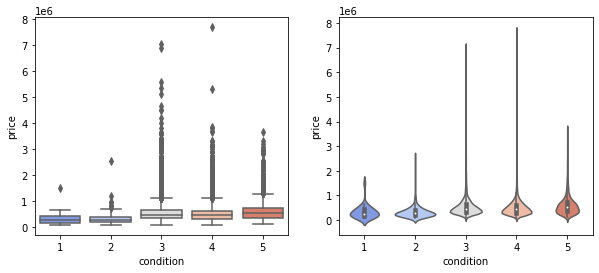

grade Vs price


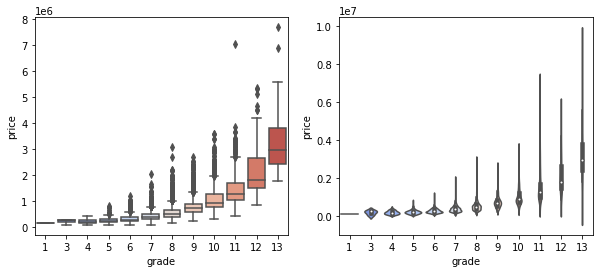

zipcode Vs price


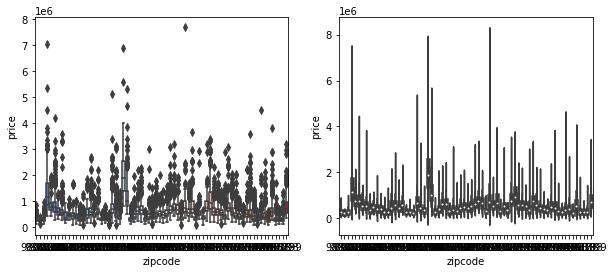

In [18]:
# categorical with target variable
plt.rcParams['figure.figsize']= 10,4
for col in df_cat:
    fig,ax= plt.subplots(1,2)
    print(col,'Vs price')
    sns.boxplot(df_cat[col],df['price'],ax=ax[0],palette='coolwarm')
    sns.violinplot(df_cat[col],df['price'],ax=ax[1],palette='coolwarm')
    plt.show()

#### Inferences from the bivariate analysis of categorical features:
* For both the values of waterfront the price follows same distribution, but the highest price is where the waterfront value is 0
* For views having values 2 or more is having very good price compared to 0 and 1
* Condition also is having direct relationship with price, houses with condition of 3 or 4 are having very good price and with values 1 and 2 are having very less price
* Grade is having exact direct relationship with price, when the grade is less price is less and when grade is high, price is also very high, for houses with grade 11 and above are having very high price
* zipcode is not distributed uniformly, but few zipcodes are having very high prices, so based on region price is also varying

### Hypothesis testing

#### Normality test for the target variable

In [19]:
import scipy.stats as st
st.shapiro(df['price'])

ShapiroResult(statistic=0.7120139598846436, pvalue=0.0)

#### The target variable is skewed, so spearman correlation should be used between numerical features.

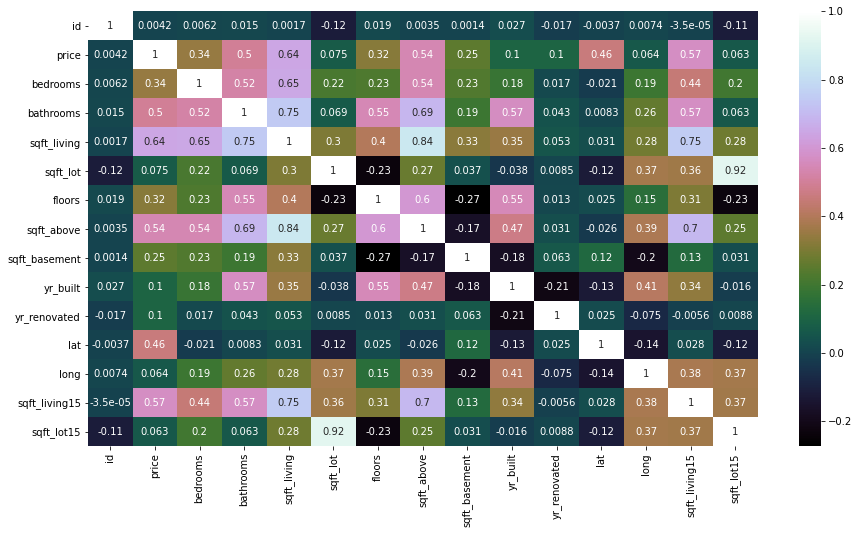

In [20]:
plt.rcParams['figure.figsize'] = 15,8
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='cubehelix')
plt.show()

* The features, id, sqft_lot, sqft_lot15,long have very less correlation with the target variable.
* Similarly yr_renovated also does not have any relation with price as observed from the bivariate analysis too, since it has only 2 values. These 5 variables should be dropped.

In [21]:
df = df.drop(['id','sqft_lot','sqft_lot15','yr_renovated','long'],axis=1)

#### For categorical features with a numerical feature which is skewed, we should use kruskal test

In [22]:
for col in df_cat:
    print(col,'Vs price')
    print(st.kruskal(df['price'],df_cat[col]))
    print('\n')

waterfront Vs price
KruskalResult(statistic=36931.57923049245, pvalue=0.0)


view Vs price
KruskalResult(statistic=35690.298593513806, pvalue=0.0)


condition Vs price
KruskalResult(statistic=33647.91461692104, pvalue=0.0)


grade Vs price
KruskalResult(statistic=32815.20996215734, pvalue=0.0)


zipcode Vs price
KruskalResult(statistic=32276.314426134624, pvalue=0.0)




##### So, all the categorical features seem to have an effect on Price column.

### Transformation and Encoding

In [23]:
X = df.drop('price',axis=1)
y = df['price']

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in X.select_dtypes(np.number):
    X[i] = pt.fit_transform(X[[i]])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.select_dtypes('object'):
    X[i] = le.fit_transform(X[[i]])

### Model building

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7,random_state=42)

In [27]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((15129, 14), (6484, 14), (15129,), (6484,))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in xtrain.columns:
    xtrain[i] = sc.fit_transform(xtrain[[i]])
for i in xtest.columns:
    xtest[i] = sc.fit_transform(xtest[[i]])

In [29]:
from sklearn.metrics import adjusted_rand_score, r2_score, mean_squared_error, mean_absolute_error

In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2759.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        06:12:59   Log-Likelihood:            -2.9652e+05
No. Observations:               21613   AIC:                         5.931e+05
Df Residuals:                   21598   BIC:                         5.932e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.31e+05   1.44e+04    -23.006      0.000   -3.59e+05   -3.03e+05
bedrooms      -1.914e+04   2039.975     -9.381      0.000   -2.31e+04   -1.51e+04
bathrooms      4.811e+04   2763.460     17.408      0.000    4.27e+04    5.35e+04
sqft_living    7.354e+04   6903.480     10.653      0.000       6e+04    8.71e+04
floors         1.591e+04   2176.637      7.307      0.000    1.16e+04    2.02e+04
waterfront     6.144e+05   1.89e+04     32.453      0.000    5.77e+05    6.52e+05
view           6.284e+04   2301.744     27.303      0.000    5.83e+04    6.74e+04
condition      1.985e+04   2547.656      7.793      0.000    1.49e+04    2.48e+04
grade          1.482e+05   2214.600     66.932      0.000    1.44e+05    1.53e+05
sqft_above    -3823.8085   6688.742     -0.572      0.568   -1.69e+04    9286.620
sqft_basement  1076.5765   3289.918      0.327      0.743   -5371.906    7525.059
yr_built      -9.936e+04   2204.637    -45.068      0.000   -1.04e+05    -9.5e+04
zipcode        -983.7083     90.251    -10.900      0.000   -1160.606    -806.810
lat            7.381e+04   1609.236     45.868      0.000    7.07e+04     7.7e+04
sqft_living15  1.031e+04   2427.805      4.248      0.000    5554.056    1.51e+04
==============================================================================
Omnibus:                    21576.276   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3708315.548
Skew:                           4.504   Prob(JB):                         0.00
Kurtosis:                      66.535   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
xtrain = xtrain.drop(['sqft_above','sqft_basement'],axis=1)
xtest = xtest.drop(['sqft_above','sqft_basement'],axis=1)

In [32]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print('Training r2_Score',lr.score(xtrain,ytrain))
print('Testing r2_Score ',lr.score(xtest,ytest))

Training r2_Score 0.6393104165570254
Testing r2_Score  0.6436903681493895


In [33]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10,min_samples_split=15,max_leaf_nodes=50, random_state=42)
dt = dt.fit(xtrain,ytrain)
ypred_dt = lr.predict(xtest)
print('Training r2_score', dt.score(xtrain,ytrain))
print('Testing r2_score', dt.score(xtest,ytest))

Training r2_score 0.8056106207404882
Testing r2_score 0.7124765175924757


In [34]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150,max_depth=7)
rf = rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)
print('Training r2_score',rf.score(xtrain,ytrain))
print('Testing r2_score',rf.score(xtest,ytest))

Training r2_score 0.8519899246088427
Testing r2_score 0.7711076336858753


In [35]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=10,random_state=42)
adb = adb.fit(xtrain,ytrain)
ypred_adb = adb.predict(xtest)
print('Training r2_score', adb.score(xtrain,ytrain))
print('Testing r2_score',adb.score(xtest,ytest))

Training r2_score 0.6351727256201458
Testing r2_score 0.5842084520737372


In [36]:
# Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb = gb.fit(xtrain,ytrain)
ypred_gb = gb.predict(xtest)
print('Training r2_score',gb.score(xtrain,ytrain))
print('Testing r2_score',gb.score(xtest,ytest))

Training r2_score 0.8904594191236069
Testing r2_score 0.8281366210011779


In [37]:
# XGBoost Regressor
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=8,random_state=42)
xgb = xgb.fit(xtrain,ytrain)
ypred_xgb = xgb.predict(xtest)
print('Training r2_score',xgb.score(xtrain,ytrain))
print('Testing r2_score',xgb.score(xtest,ytest))

Training r2_score 0.8765340285879546
Testing r2_score 0.7983986048628116


#### Gradient Boost Regressor is giving the highest rsquare value,so it is the best model.

In [38]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': gb.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False, inplace=True)
important_features

,Features,Importance
2,sqft_living,0.36
7,grade,0.31
10,lat,0.16
8,yr_built,0.05
9,zipcode,0.04
4,waterfront,0.03
5,view,0.03
11,sqft_living15,0.02
1,bathrooms,0.01
6,condition,0.00


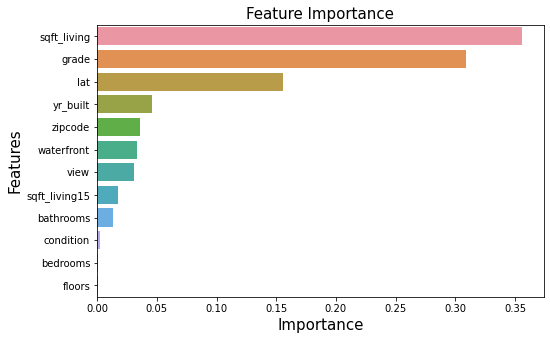

In [39]:
plt.rcParams['figure.figsize'] = 8,5
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

#### Conclusion (Things to be considered mainly for knowing the house price):
* The sqft_living is influencing the price feature mostly, so the price of a house is highly determined by the sqft of the living room
* It is followed by grade, as we saw from bivariate analysis, it is having a direct and strong relationship with price
* Lat is also influencing price, so it depends upon the area to determine the price
* yr_built is having good effect on price, even though it is not having a linear relationship with price, it is influencing price too
* zipcode, same as latitude is having some influence
* waterfront and view are also having effect on price, which is observed from bivariate too
* The number of bathrooms is having little effect on price as we saw from bivariate, but number of bedrooms is not having that much effect.